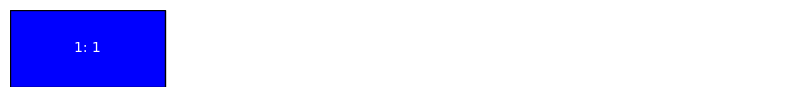

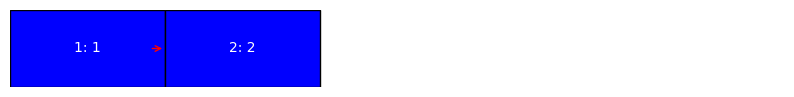

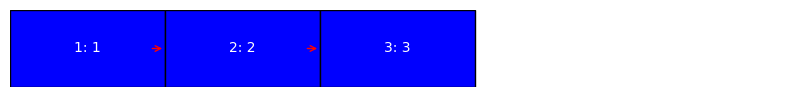

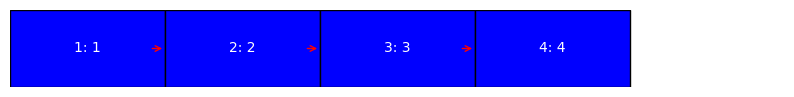

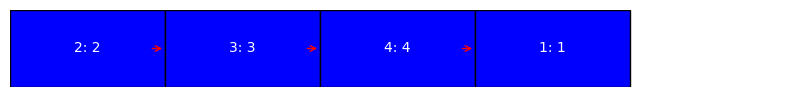

1


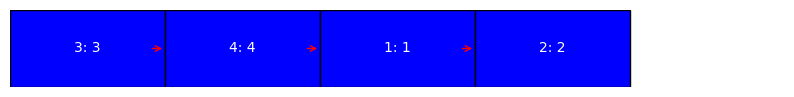

2


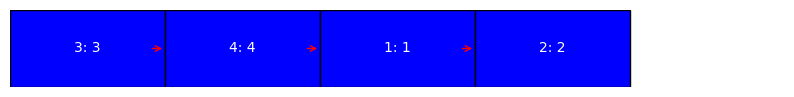

-1


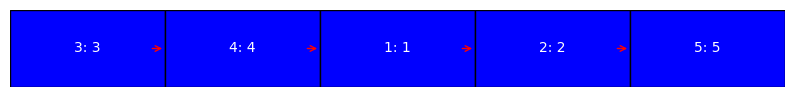

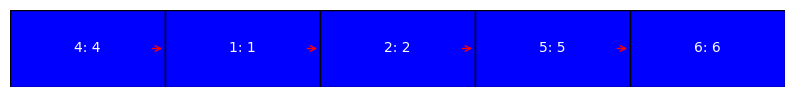

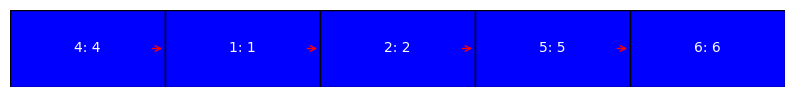

-1


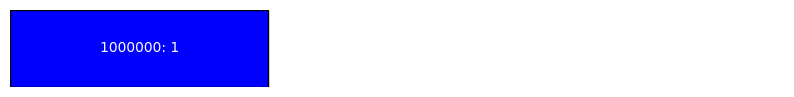

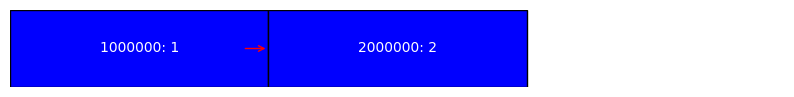

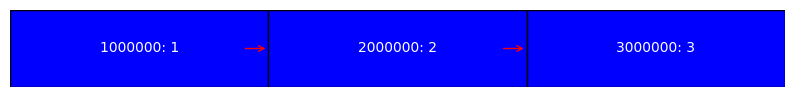

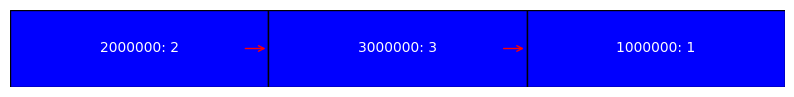

1


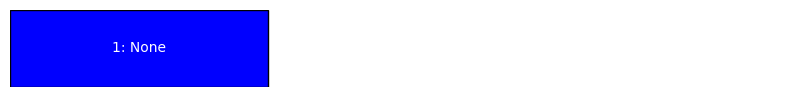

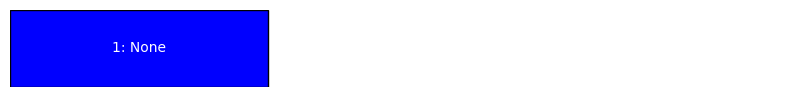

None


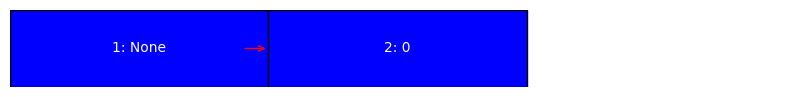

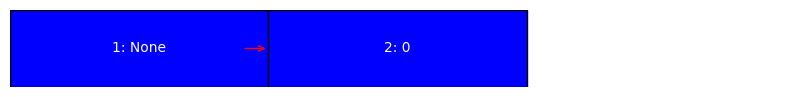

0


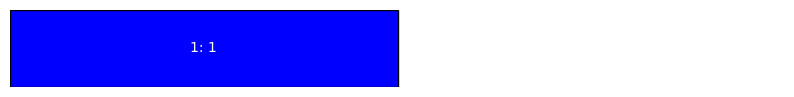

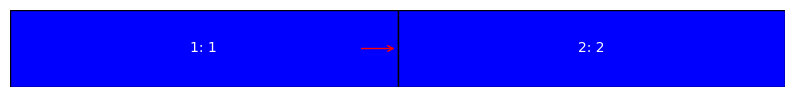

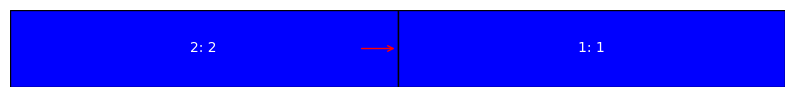

1


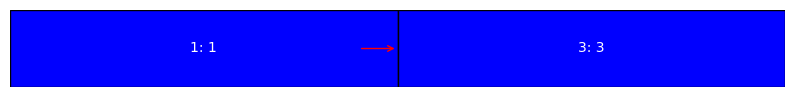

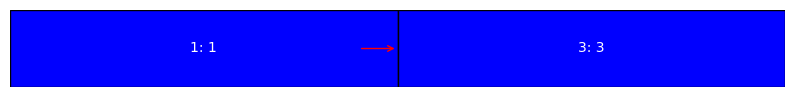

-1


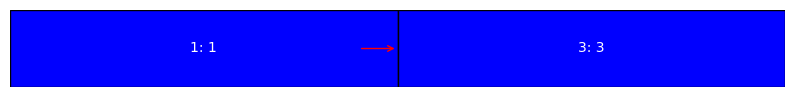

3


In [6]:
from collections import OrderedDict
import matplotlib.pyplot as plt
from IPython.display import display, HTML


# Defining the LRU_Cache class with visualizations
class LRU_Cache(object):

    def __init__(self, capacity: int):
        """
        Initialize the class variables
        """
        self.capacity = capacity
        self.cache = OrderedDict()

    def get(self, key: int) -> int:
        """
        Retrieve item from provided key. Return -1 if nonexistent.
        """
        if key not in self.cache:
            self.visualize_cache("Miss", key, None)
            return -1
        else:
            self.cache.move_to_end(key)  # Move the current key to the end (most recent)
            self.visualize_cache("Hit", key, self.cache[key])
            return self.cache[key]

    def set(self, key: int, value: int):
        """
        Set the value if the key is not present in the cache. If the cache is at capacity, remove the oldest item and then insert the new item.
        """
        if key in self.cache:
            self.cache.move_to_end(key)  # Move the current key to the end (most recent)
        self.cache[key] = value
        if len(self.cache) > self.capacity:
            removed_key, removed_value = self.cache.popitem(
                last=False)  # Remove the least recently used item (first item)
            self.visualize_cache("Put", key, value, removed_key)
        else:
            self.visualize_cache("Put", key, value)

    def visualize_cache(self, action: str, key: int, value: int, removed_key=None):
        """
        Visualize the current state of the cache
        """
        display(HTML(f"<h3>Action: {action} - Key: {key} - Value: {value}</h3>"))

        if removed_key is not None:
            display(HTML(f"<h4>Removed Key: {removed_key}</h4>"))

        cache_content = []
        for k, v in self.cache.items():
            cache_content.append(f"{k}: {v}")

        display(HTML("<p>" + " -> ".join(cache_content) + "</p>"))

        fig, ax = plt.subplots(figsize=(10, 1))
        ax.set_xlim(0, self.capacity)
        ax.set_ylim(0, 1)

        for i, (k, v) in enumerate(self.cache.items()):
            ax.add_patch(plt.Rectangle((i, 0), 1, 1, edgecolor='black', facecolor='blue'))
            ax.text(i + 0.5, 0.5, f"{k}: {v}", horizontalalignment='center', verticalalignment='center', color='white')

        # Add arrows
        for i in range(len(self.cache) - 1):
            ax.annotate('', xy=(i + 1, 0.5), xytext=(i + 0.9, 0.5),
                        arrowprops=dict(arrowstyle="->", color='red'))

        plt.axis('off')
        plt.show()


# Example usage
our_cache = LRU_Cache(5)
our_cache.set(1, 1)
our_cache.set(2, 2)
our_cache.set(3, 3)
our_cache.set(4, 4)

print(our_cache.get(1))  # Returns 1
print(our_cache.get(2))  # Returns 2
print(our_cache.get(9))  # Returns -1 because 9 is not present in the cache

our_cache.set(5, 5)
our_cache.set(6, 6)

print(our_cache.get(3))  # Returns -1 because the cache reached its capacity and 3 was the least recently used entry

# Additional test cases

# Test Case 1: Very large values
our_cache_large = LRU_Cache(3)
our_cache_large.set(1000000, 1)
our_cache_large.set(2000000, 2)
our_cache_large.set(3000000, 3)
print(our_cache_large.get(1000000))  # Returns 1

# Test Case 2: Null or empty values
our_cache_null = LRU_Cache(3)
our_cache_null.set(1, None)
print(our_cache_null.get(1))  # Returns None
our_cache_null.set(2, 0)
print(our_cache_null.get(2))  # Returns 0

# Test Case 3: Cache with limited size
our_cache_small = LRU_Cache(2)
our_cache_small.set(1, 1)
our_cache_small.set(2, 2)
print(our_cache_small.get(1))  # Returns 1
our_cache_small.set(3, 3)
print(our_cache_small.get(2))  # Returns -1 (2 was removed due to capacity limit)
print(our_cache_small.get(3))  # Returns 3


In [7]:
!jupyter nbconvert --to html *.ipynb

[NbConvertApp] Converting notebook main.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 24 image(s).
[NbConvertApp] Writing 380762 bytes to main.html
